## 针对泰坦尼克号乘客数据集的数据分析

在这个项目中，我们将针对泰坦尼克号乘客数据集展开分析，对于乘客的某些信息进行一些描述性的统计分析，并简要分析乘客的某些因素与生还率之间是否具有相关性或具有怎样程度的相关性。

### 导入和熟悉数据

首先，导入分析所需的Python库并载入数据文件。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Titanic_data=pd.read_csv('/home/milhaven1733/titanic-data.csv')

载入数据后，先来查看几行数据，熟悉一下数据集中包含哪些字段，分别是什么数据类型以及表示哪方面的信息。

查看DataFrame的前5行，大致了解包含哪些字段:

In [2]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


查看字段数据类型，以及哪些字段存在缺失:

In [3]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


有信息登记的乘客总数：891  
数据集共包含12个字段：

| 字段        | 含义    |  数据类型  | 缺失数量|
| --------   | -----:  | ----: | :----:|
| PassengerId| 乘客ID  |   int64 |无    |
|Survived  |是否幸存（1表示幸存）|int64|无|
|Pclass|船票等级（在1/2/3等舱）|int64|无|
|Name|乘客姓名|object|无|
|Sex|乘客性别|object|无|
|Age |乘客年龄|float64|277|
|SibSp|船上兄弟姐妹/配偶的数量|int64|无|
|Parch|船上父母/子女的数量|int64|无|
|Ticket|船票信息|object|无|
|Fare|票价|float64|无|
|Cabin|舱位信息|object|687|
|Embarked |登船港口|object|2|


### 清理数据

"Age"字段存在较多缺失值，为了方便之后的统计与计算，我们可以使用年龄的平均值来填充缺失值的字段

In [4]:
passenger_age=Titanic_data["Age"]
print passenger_age.describe()
Titanic_data['Age'].fillna(passenger_age.mean(),inplace=True)
print passenger_age.describe()  #用均值来填充，Age的部分描述统计量不发生变化

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


### 提出问题

对于数据集的内容、结构有了一定的了解，我们可以尝试提出一些感兴趣的问题，进行探索和分析：
- 有多少乘客获救幸存，占比多少？
- 乘客的性别、年龄、船票等级、票价，船上家人数量呈现怎样的分布？
- 乘客的性别、年龄、船票等级、票价、船上家人数量与是否幸存存在相关性吗？存在怎样的相关性、相关程度如何？

### 数据探索

#### 问题一：有多少乘客获救幸存，占比多少？

In [5]:
Titanic_data.groupby(['Survived'])['PassengerId'].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

可以看出，有342名乘客获救幸存，549名乘客未能生还。

用图形化表示以上数据。先创建条形图，可以看出未获救的乘客数量明显多于幸存的乘客数量：

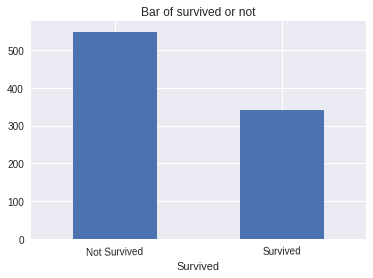

In [6]:
def paint_bar(data,title,x_ticklabel):
    ax=plt.gca()
    bar=data.plot(kind='bar')
    ax.set_title(title)
    ax.set_xticklabels(x_ticklabel,rotation=1)
paint_bar(Titanic_data.groupby(['Survived'])['PassengerId'].count(),"Bar of survived or not",["Not Survived","Survived"])

用饼状图可以更清晰地显示（未）幸存乘客占比：

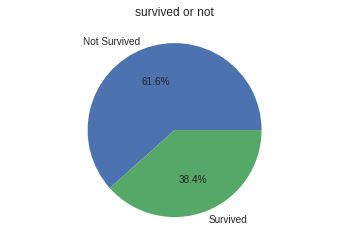

In [7]:
def plt_pie(title,data,label):
    plt.axis('equal')
    plt.title(title)
    plt.pie(data,labels=label,autopct='%1.1f%%')
    plt.show()
var=Titanic_data.groupby(['Survived']).count()
plt_pie('survived or not',var['PassengerId'],["Not Survived","Survived"])

#### 问题二：乘客的性别、年龄、船票等级、票价、船上家人数量呈现怎样的分布？

首先对乘客性别比例进行分析：

male      577
female    314
Name: Sex, dtype: int64


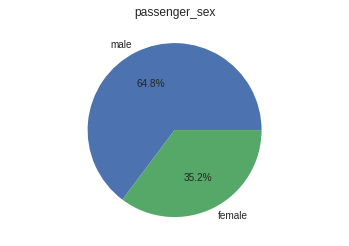

In [8]:
passenger_sex=Titanic_data['Sex']
data=passenger_sex.value_counts()
print data
plt_pie('passenger_sex',data,['male','female'])

可以看出，大概三分之二的乘客为男性。

接下来查看乘客船票等级的分布：

3    491
1    216
2    184
Name: Pclass, dtype: int64


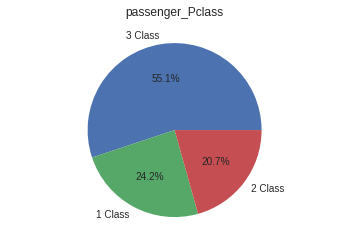

In [9]:
passenger_Pclass=Titanic_data['Pclass']
data=passenger_Pclass.value_counts()
print data
plt_pie('passenger_Pclass',data,['3 Class','1 Class','2 Class'])

可以看出，过半的乘客购买了三等船票，接近四分之一的乘客是一等票，其余五分之一的乘客为二等票。

接下来查看票价的分布：

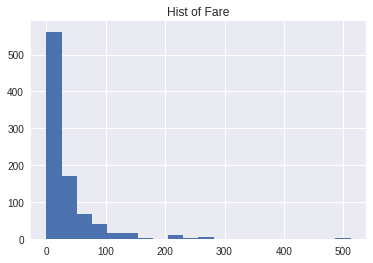

In [10]:
def paint_hist(data,title,bin):
    fig,ax = plt.subplots()
    data.hist(bins=bin)
    ax.set_title(title)
passenger_fare=Titanic_data["Fare"]
paint_hist(passenger_fare,"Hist of Fare",20)

In [11]:
Titanic_data["Fare"][Titanic_data["Fare"]>200].count()

20

绝大部分乘客的票价在0-50之间(总体半数以上票价在25以内)，也有极少量的乘客购买200以上的高价船票（20人左右）

对乘客年龄进行分析：

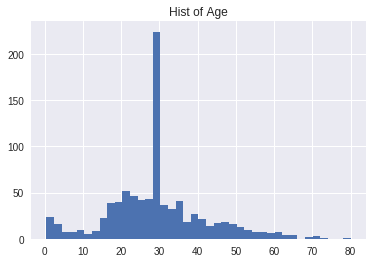

In [12]:
paint_hist(passenger_age,"Hist of Age",40)

由于用均值填充了缺失值的字段，导致均值所在范围高度比较异常。暂考虑在外。
除了0-4岁乘客数量稍多以外，乘客的年龄分布大体呈现正态分布，均值在30岁左右

对家人在船上的数量进行分析：

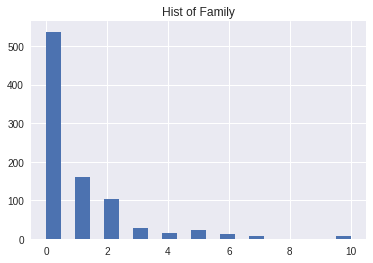

In [13]:
passenger_family=Titanic_data['SibSp']+Titanic_data['Parch']
paint_hist(passenger_family,"Hist of Family",21)

可以看出，大部分(60%左右)乘客没有家人在船上。

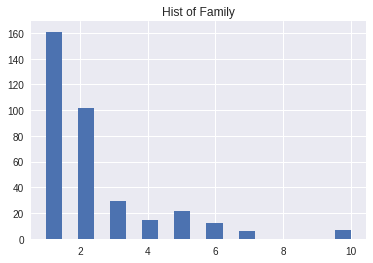

In [14]:
passenger_has_family=passenger_family[passenger_family>0]
paint_hist(passenger_has_family,"Hist of Family",19)

对有家人在船上的乘客进行分析，大部分（大约80%）乘客有1-3名家人在船上。

#### 问题三：乘客的性别、年龄、船票等级、票价、船上家人数量与是否幸存存在相关性吗？存在怎样的相关性、相关程度如何？

1）分析乘客性别与幸存率的关系：

首先来看幸存乘客中的性别占比：

In [15]:
Survived_Passenger=Titanic_data[Titanic_data.Survived==1]  #幸存乘客信息DataFrame

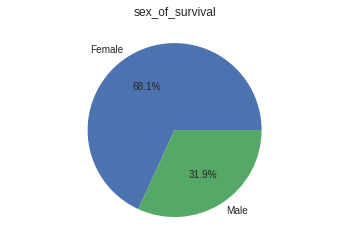

In [16]:
Survived_sex=Survived_Passenger.groupby(['Sex'])['PassengerId'].count()
plt_pie('sex_of_survival',Survived_sex,['Female','Male'])

幸存者中，女性占2/3、男性占1/3左右。

再来看男性乘客和女性乘客群体 各自的幸存比例：

In [17]:
#print Titanic_data.groupby(['Sex']).count()
Survived_by_sex=Titanic_data.groupby(['Sex'])['Survived']
print Survived_by_sex.count()
print Survived_by_sex.sum()

Sex
female    314
male      577
Name: Survived, dtype: int64
Sex
female    233
male      109
Name: Survived, dtype: int64


用柱状图体现：

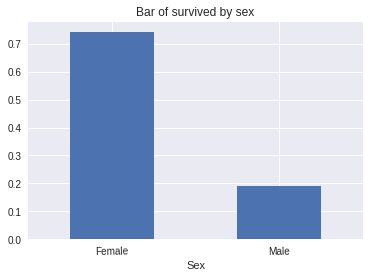

In [18]:
sex_scale=Survived_by_sex.sum()/Survived_by_sex.count()
paint_bar(sex_scale,"Bar of survived by sex",["Female","Male"])

可以看出，船上的女乘客有70%以上获救，但幸存的男乘客不足20%.因此幸存率与性别有相关性。

2） 分析乘客船票等级与幸存率的关系：

首先来看幸存乘客中的各个等级的占比：

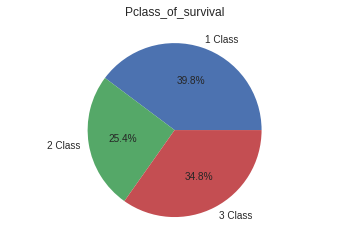

In [19]:
Survived_Pclass=Survived_Passenger.groupby(['Pclass'])['PassengerId'].count()
plt_pie('Pclass_of_survival',Survived_Pclass,['1 Class','2 Class','3 Class'])

可以看出，幸存的乘客中，买了一等票的人占比最多。

再来看，购买不同等级船票人群各自的幸存率：   

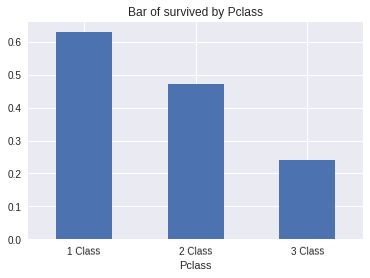

In [20]:
#Titanic_data.groupby(['Pclass']).count()
Survived_by_Pclass=Titanic_data.groupby(['Pclass'])['Survived']
Pclass_scale=Survived_by_Pclass.sum()/Survived_by_Pclass.count()
paint_bar(Pclass_scale,"Bar of survived by Pclass",['1 Class','2 Class','3 Class'])

由图表可以发现，购买一等票的乘客幸存率最高，二等次之，三等最低。说明幸存率和船票等级有一定的相关性。

3)分析幸存率与船上家人数量之间的相关性：   

In [21]:
Titanic_data['Family']=Titanic_data['SibSp']+Titanic_data['Parch']   #在DataFrame中添加一列表示家人数量

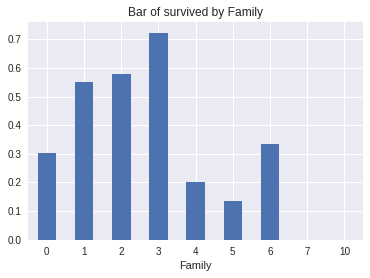

In [22]:
#Titanic_data.groupby(['Family']).count()
Family_scale=Titanic_data.groupby(['Family'])['Survived'].sum()/Titanic_data.groupby(['Family'])['Survived'].count()
paint_bar(Family_scale,"Bar of survived by Family",[0,1,2,3,4,5,6,7,10])

可以看出，当有1-3位家人同时在船上时，幸存的几率会更高些。（但也可能是有更多家人在船上的乘客基数比较小，比较幸存比例没有太大的意义。）

4）分析幸存率与票价之间的相关性：

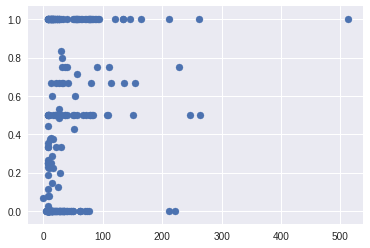

In [23]:
Survived_by_Fare=Titanic_data.groupby(['Fare'],as_index=False)['Survived']
fare=Survived_by_Fare.count()['Fare']
Fare_scale=(Survived_by_Fare.sum()/Survived_by_Fare.count())['Survived']
plt.scatter(fare,Fare_scale)

以票价为横坐标，票价对应的幸存率为纵坐标做散点图，发现分布比较无规律性。票价无论高低均有幸存率高或低的乘客。

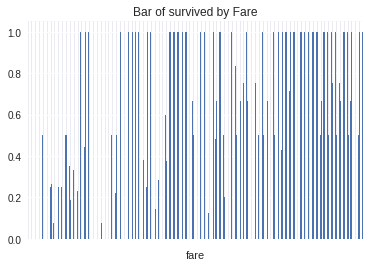

In [24]:
paint_bar(Fare_scale,"Bar of survived by Fare",[])
ax=plt.gca()
ax.set_xlabel('fare')

绘制票价对应幸存率的柱状图，由于票价种类数目较大，柱状图表达效果也较差，但大体可以看出幸存率较高的柱体集中在票价较高的区域。从整体来分析，由于买较高票价的乘客数量较少而幸存率普遍较高，可以得出票价较高的乘客幸存率也较高的推测。

5)分析幸存率与年龄之间的相关性：

首先来看各个年龄的乘客人数分布的条形图：

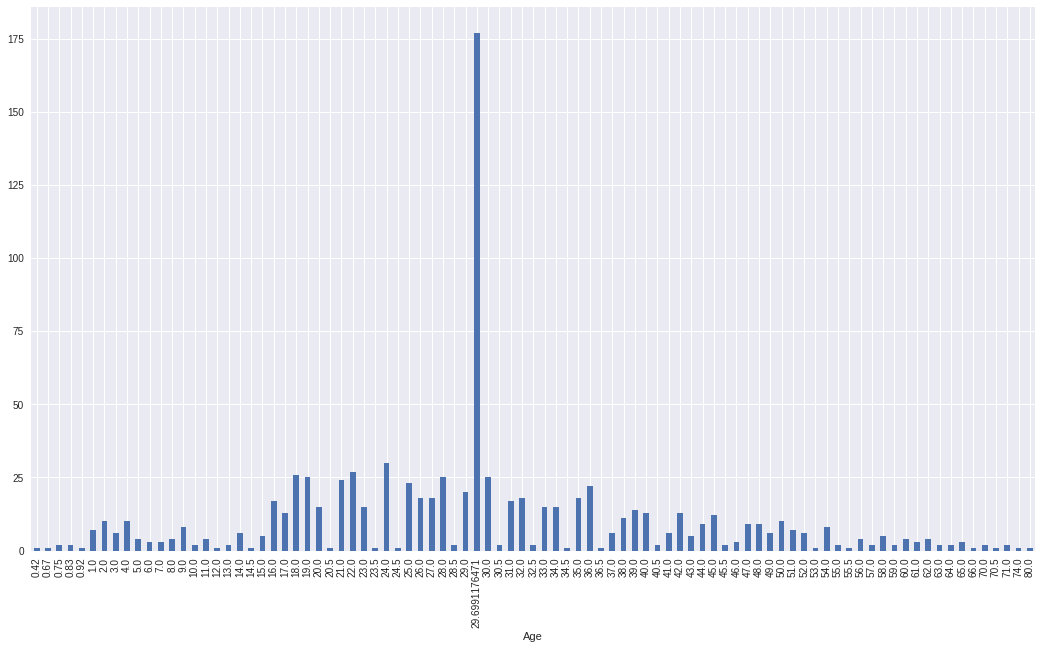

In [25]:
fig,ax1= plt.subplots(figsize=(18,10))
Survived_age_all=Titanic_data.groupby(['Age'])['PassengerId'].count()
Survived_age_all.plot(kind="bar")

再看幸存乘客中各个年龄的人数分布条形图：

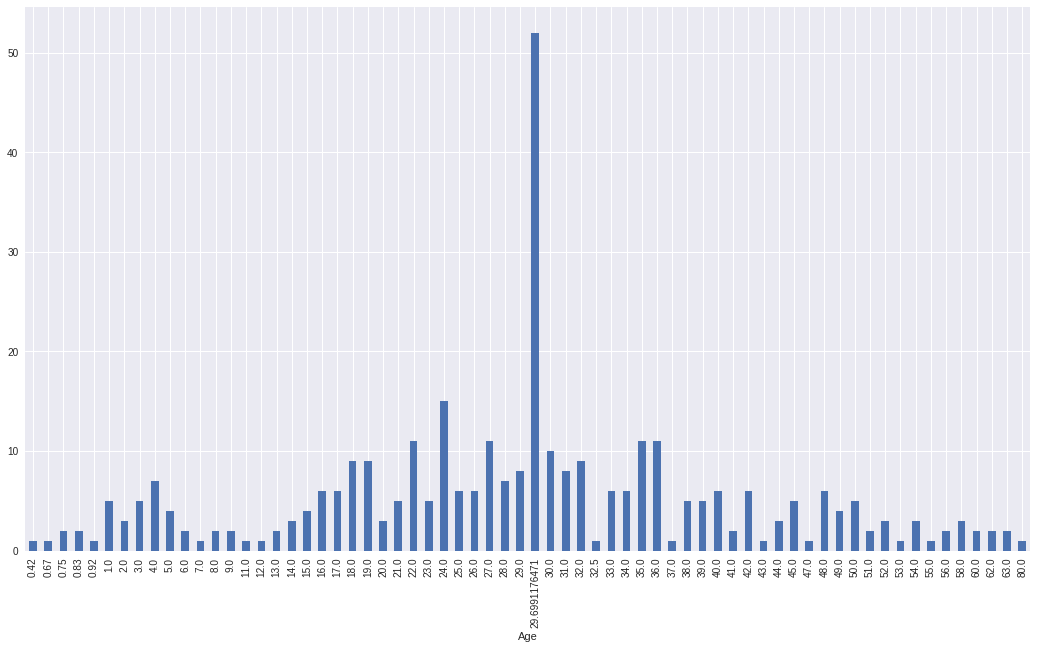

In [26]:
fig,ax1= plt.subplots(figsize=(18,10))
Survived_age=Survived_Passenger.groupby(['Age'])['PassengerId'].count()
Survived_age.plot(kind="bar")

两图分布形状大体近似。幸存率看似和年龄关系不大。（用均值填充使均值对应的柱体高度比较异常）

接下来可以直接计算一下各个年龄的乘客的幸存率：

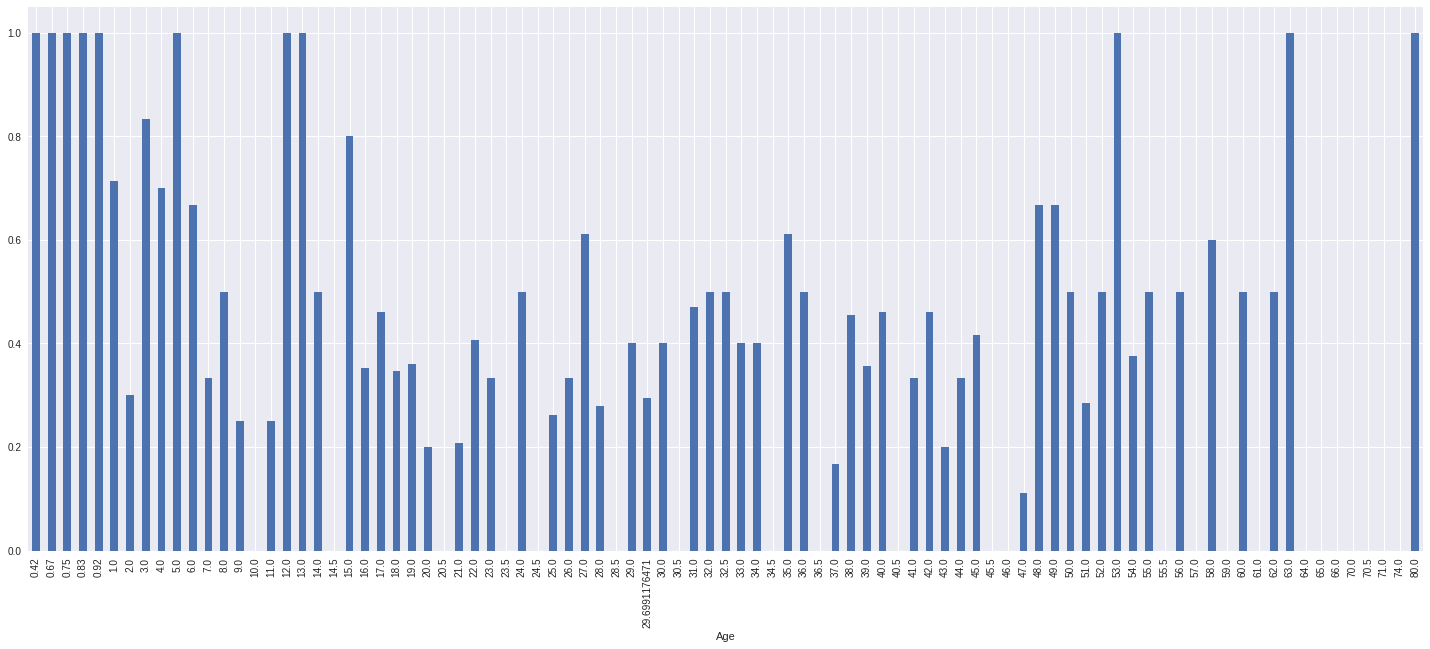

In [27]:
fig,ax1= plt.subplots(figsize=(25,10))
Survived_by_Age=Titanic_data.groupby(['Age'])['Survived']
Age_scale=Survived_by_Age.sum()/Survived_by_Age.count()
Age_scale.plot(kind="bar")

从这张图表可以看出，0-14岁，50岁以上的乘客幸存率更高。所以幸存率和年龄还是有一定相关性的，孩子，老人更容易获救。

### 得出结论

通过上面对于数据的一些探索，针对我们之前提出的问题，我们大体可以做出如下的结论：
- 有３８％左右乘客幸存
- 乘客中男性占三分之二、三等舱乘客占半数以上、大部分乘客在船上没有同行的家人，年龄呈现正态分布，均值在３０岁左右
- 性别、票价（舱位）等级、年龄，家人等因素都与幸存率有相关性。其中性别对幸存率影响最大（女性幸存率远高于男性），船票的等级对于是否幸存也有较大影响（级别、票价越高的舱位，幸存率也会越高）。同时当在船上有１－３个家人时，乘客的幸存率也会有所提高。最后，年龄也是幸存率的一个影响因素，小孩，老人获救的几率相对更高。

### 分析的局限性

由于：
- 没有全部乘客的信息，现有信息的一些字段缺失
- 没有从统计学意义上对分析的结果加以验证结果是否具有偶然性
- 可能还有一些隐含因素对幸存率有影响但信息中未给出　

分析结论几乎全部由对整理数据所得图表推断得出，因而分析具有很大的局限性，结论只是暂时的。

### 参考资料

- [ Python数据可视化：Matplotlib 直方图、箱线图、条形图、热图、折线图、散点图](http://blog.csdn.net/kevinelstri/article/details/52938604)
- [python__matplotlib画直方图](http://www.jianshu.com/p/edf46a6c091b)
- [python中plt.hist参数详解](http://www.cnblogs.com/python-life/articles/6084059.html)
- [Python--matplotlib 绘图可视化练手--折线图/条形图](https://zhuanlan.zhihu.com/p/24952180)
- [Titanic数据分析报告（python）](http://blog.csdn.net/csqazwsxedc/article/details/51336798)